In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [4]:
data=data.drop(labels='education',axis=1)    #Dropping education column

In [5]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data_new = pd.DataFrame(imputer.fit_transform(data))
data_new.columns = data.columns
data_new.index = data.index

In [7]:
data_new.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
X = data_new.iloc[:,:-1].values
y = data_new.iloc[:, -1].values

In [9]:
X[:,8]=(X[:,8]-min(X[:,8]))/(max(X[:,8])-min(X[:,8]))
X[:,9]=(X[:,9]-min(X[:,9]))/(max(X[:,9])-min(X[:,9]))
X[:,10]=(X[:,10]-min(X[:,10]))/(max(X[:,10])-min(X[:,10]))
X[:,11]=(X[:,11]-min(X[:,11]))/(max(X[:,11])-min(X[:,11]))
X[:,12]=(X[:,12]-min(X[:,12]))/(max(X[:,12])-min(X[:,12]))
X[:,13]=(X[:,13]-min(X[:,13]))/(max(X[:,13])-min(X[:,13]))


In [10]:
X[:,1]/=10
X[:,3]/=10



Text(0.5, 1.0, 'Class Distributions after resampling')

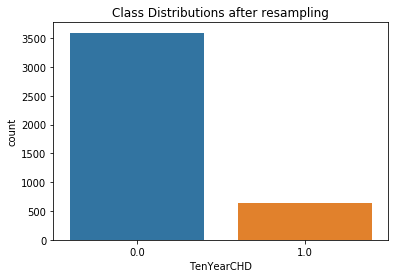

In [11]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
smote=SMOTE()
df_temp = {'TenYearCHD' : y}
df = pd.DataFrame(df_temp)
plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling')

In [12]:
X_train,Y_train=smote.fit_sample(X,y)

In [13]:
from collections import Counter
print("Before SMOTE: ",Counter(y))
print("After SMOTE: ",Counter(Y_train))

Before SMOTE:  Counter({0.0: 3594, 1.0: 644})
After SMOTE:  Counter({0.0: 3594, 1.0: 3594})


Text(0.5, 1.0, 'Class Distributions after resampling')

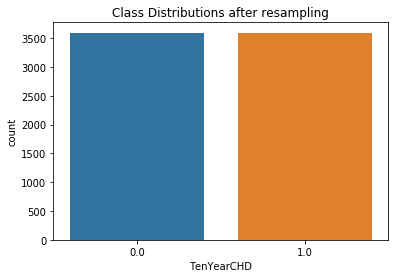

In [14]:
df_temp = {'TenYearCHD' : Y_train}
df = pd.DataFrame(df_temp)

plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling')

In [15]:
Y_train = Y_train.reshape(len(Y_train), 1)
print(X_train.shape, Y_train.shape)

(7188, 14) (7188, 1)


In [16]:
import random
combined=list(zip(X_train,Y_train))

In [17]:
random.shuffle(combined)

In [18]:
X_train[:],Y_train[:]=zip(*combined)

In [19]:
print(X_train.shape, Y_train.shape)

(7188, 14) (7188, 1)


In [20]:
X=np.array(X_train)
y=np.array(Y_train)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape

(5750, 14)

In [24]:
y_train.shape

(5750, 1)

In [25]:
X_test.shape

(1438, 14)

In [26]:
y_test.shape

(1438, 1)

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF train roc-auc: 1.0
RF test roc-auc: 0.9955430782895571


In [29]:
ytrain_pred

array([[0.  , 1.  ],
       [0.05, 0.95],
       [0.08, 0.92],
       ...,
       [0.95, 0.05],
       [0.07, 0.93],
       [0.05, 0.95]])

In [30]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic train roc-auc: 0.7227370811991269
Logistic test roc-auc: 0.721235068066054


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Adaboost train roc-auc: 0.8467610296104937
Adaboost test roc-auc: 0.8291052622038537


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Adaboost train roc-auc: 0.9898356402285621
Adaboost test roc-auc: 0.9472408776986243


In [33]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9825575072053945


In [34]:

pd.concat(pred,axis=1)

,0,1,2,3
0,0.33,0.806251,0.506168,0.4
1,1.00,0.827146,0.512253,1.0
2,0.97,0.773424,0.507738,1.0
3,1.00,0.824996,0.509240,1.0
4,0.65,0.672763,0.504042,0.0
...,...,...,...,...
1433,0.97,0.677002,0.506905,0.8
1434,0.80,0.686143,0.511981,0.8
1435,0.95,0.765702,0.510284,1.0
1436,0.91,0.634557,0.513665,1.0


In [35]:

final_prediction

0       0.510605
1       0.834850
2       0.812790
3       0.833559
4       0.456701
          ...   
1433    0.738477
1434    0.699531
1435    0.806496
1436    0.764555
1437    0.761379
Length: 1438, dtype: float64

In [36]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.86993842, 0.86993842, 0.86618556, 0.8640658 , 0.86346322,
       0.85827482, 0.85816235, 0.85464634, 0.8542466 , 0.85418534,
       0.85412925, 0.85020915, 0.84990871, 0.84974459, 0.84936473,
       0.83937753, 0.83937688, 0.83917869, 0.83909606, 0.8381889 ,
       0.83815502, 0.83594359, 0.83554953, 0.83397174, 0.8338628 ,
       0.83343879, 0.83334369, 0.83292473, 0.83265918, 0.83247728,
       0.83234587, 0.82901833, 0.82889045, 0.82872398, 0.82871701,
       0.82863493, 0.82852036, 0.82634679, 0.82634293, 0.82588201,
       0.82581222, 0.82171639, 0.8215196 , 0.82082563, 0.82075059,
       0.81984854, 0.81970216, 0.81856159, 0.81829952, 0.81812664,
       0.81806422, 0.81720942, 0.81718607, 0.81507706, 0.81478229,
       0.81405585, 0.81397875, 0.8129469 , 0.81279044, 0.81139747,
       0.81127323, 0.80974504, 0.80947319, 0.80852697, 0.80817831,
       0.80794088, 0.80791772, 0.80783755, 0.80755783, 0.80726867,
       0.80714574, 0.80681522, 0.80649649, 0.80200993, 0.80199

In [37]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
204,0.641804,0.947844
230,0.571984,0.947844
225,0.580975,0.947149
226,0.578468,0.947149
229,0.572965,0.947149


In [38]:

accuracy_ls

,thresholds,accuracy
204,0.641804,0.947844
230,0.571984,0.947844
225,0.580975,0.947149
226,0.578468,0.947149
229,0.572965,0.947149
...,...,...
4,0.863463,0.317107
3,0.864066,0.316412
2,0.866186,0.309458
1,0.869938,0.308762


In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

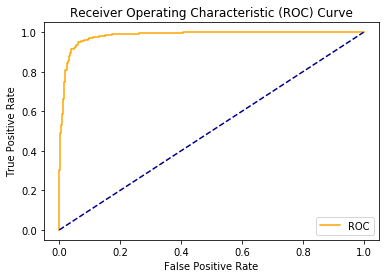

In [40]:
plot_roc_curve(fpr,tpr)